In [3]:
import json
with open("get_new_scores_results.json", "r") as f:
    results = json.load(f)


Arquivo 'get_new_scores_results.json' carregado com sucesso.
Gerando o gráfico com Matplotlib...
Gráfico salvo com sucesso como 'boxplot_matplotlib_modificado.png'.


/tmp/ipykernel_65194/1668290044.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)


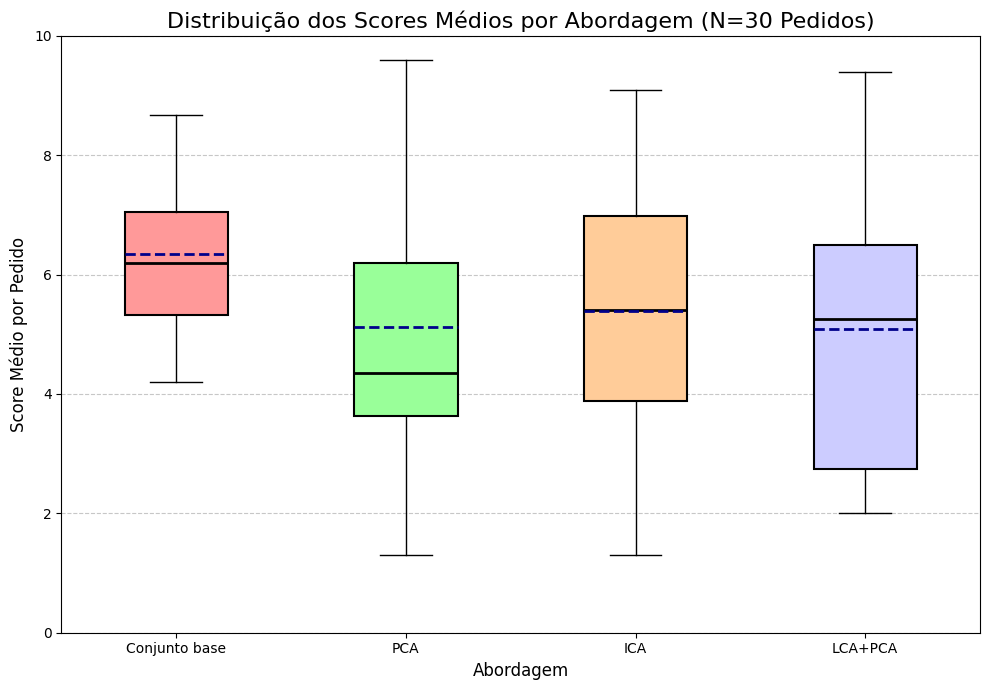

In [12]:
import matplotlib.pyplot as plt
import json
import numpy as np

# --- 1. Carregar o Arquivo JSON ---
file_path = "get_new_scores_results.json"
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar as Listas de Dados ---
    # Inicializar listas para cada categoria
    base_completa_scores = []
    # base_elite_lca_scores foi removida
    pca_gerado_scores = []
    ica_gerado_scores = []
    lca_pca_gerado_scores = []
    
    # Iterar sobre cada pedido e coletar os scores
    for item in data:
        # Usar .get() para evitar erros se a chave não existir
        if item.get("pca") and item["pca"].get("base_mean_score") is not None:
            base_completa_scores.append(item["pca"]["base_mean_score"])
            
        # A coleta para base_elite_lca_scores foi removida
            
        if item.get("pca") and item["pca"].get("mean_score") is not None:
            pca_gerado_scores.append(item["pca"]["mean_score"])
            
        if item.get("ica") and item["ica"].get("mean_score") is not None:
            ica_gerado_scores.append(item["ica"]["mean_score"])
            
        if item.get("lca_pca") and item["lca_pca"].get("mean_score") is not None:
            lca_pca_gerado_scores.append(item["lca_pca"]["mean_score"])

    # Agrupar os dados para o boxplot
    data_to_plot = [
        base_completa_scores, 
        # base_elite_lca_scores foi removida
        pca_gerado_scores, 
        ica_gerado_scores, 
        lca_pca_gerado_scores
    ]
    
    # Definir os rótulos do eixo X
    labels = [
        "Conjunto base", 
        # "Base (Elite LCA)" foi removido
        "PCA", 
        "ICA", 
        "LCA+PCA"
    ]

    # --- 3. Criar o Gráfico com Matplotlib ---
    print("Gerando o gráfico com Matplotlib...")
    
    fig, ax = plt.subplots(figsize=(10, 7)) # Ajustei o tamanho
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)

    # --- 4. Customizar o Gráfico ---
    ax.set_title('Distribuição dos Scores Médios por Abordagem (N=30 Pedidos)', fontsize=16)
    ax.set_ylabel('Score Médio por Pedido', fontsize=12)
    ax.set_xlabel('Abordagem', fontsize=12)
    ax.set_ylim(0, 10)
    
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Não é mais necessário girar os rótulos, 4 cabem bem
    # plt.xticks(rotation=15, ha="right")
    
    # Adicionar cores às caixas (agora 4 cores)
    colors = ['#FF9999', '#99FF99', '#FFCC99', '#CCCCFF']
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor(colors[i % len(colors)])
        box.set_edgecolor('black')
        box.set_linewidth(1.5)

    # Melhorar a aparência das medianas e médias
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(2)
        
    for mean in bp['means']:
        mean.set_color('darkblue') # Mudei para darkblue para melhor contraste
        mean.set_linestyle('--')
        mean.set_linewidth(2)

    plt.tight_layout()

    # --- 5. Salvar a Imagem ---
    output_filename = "boxplot_matplotlib_modificado.png"
    plt.savefig(output_filename)
    
    print(f"Gráfico salvo com sucesso como '{output_filename}'.")

else:
    print("Não foi possível gerar o gráfico pois os dados não foram carregados.")

Arquivo 'get_new_scores_results.json' carregado com sucesso.
Média da Base (Completa) calculada: 6.34
Intervalos (bins) definidos de 1.0 a 14.0.
Gerando os histogramas facetados...
Gráfico salvo com sucesso como 'histogramas_facetados_com_base.png'.


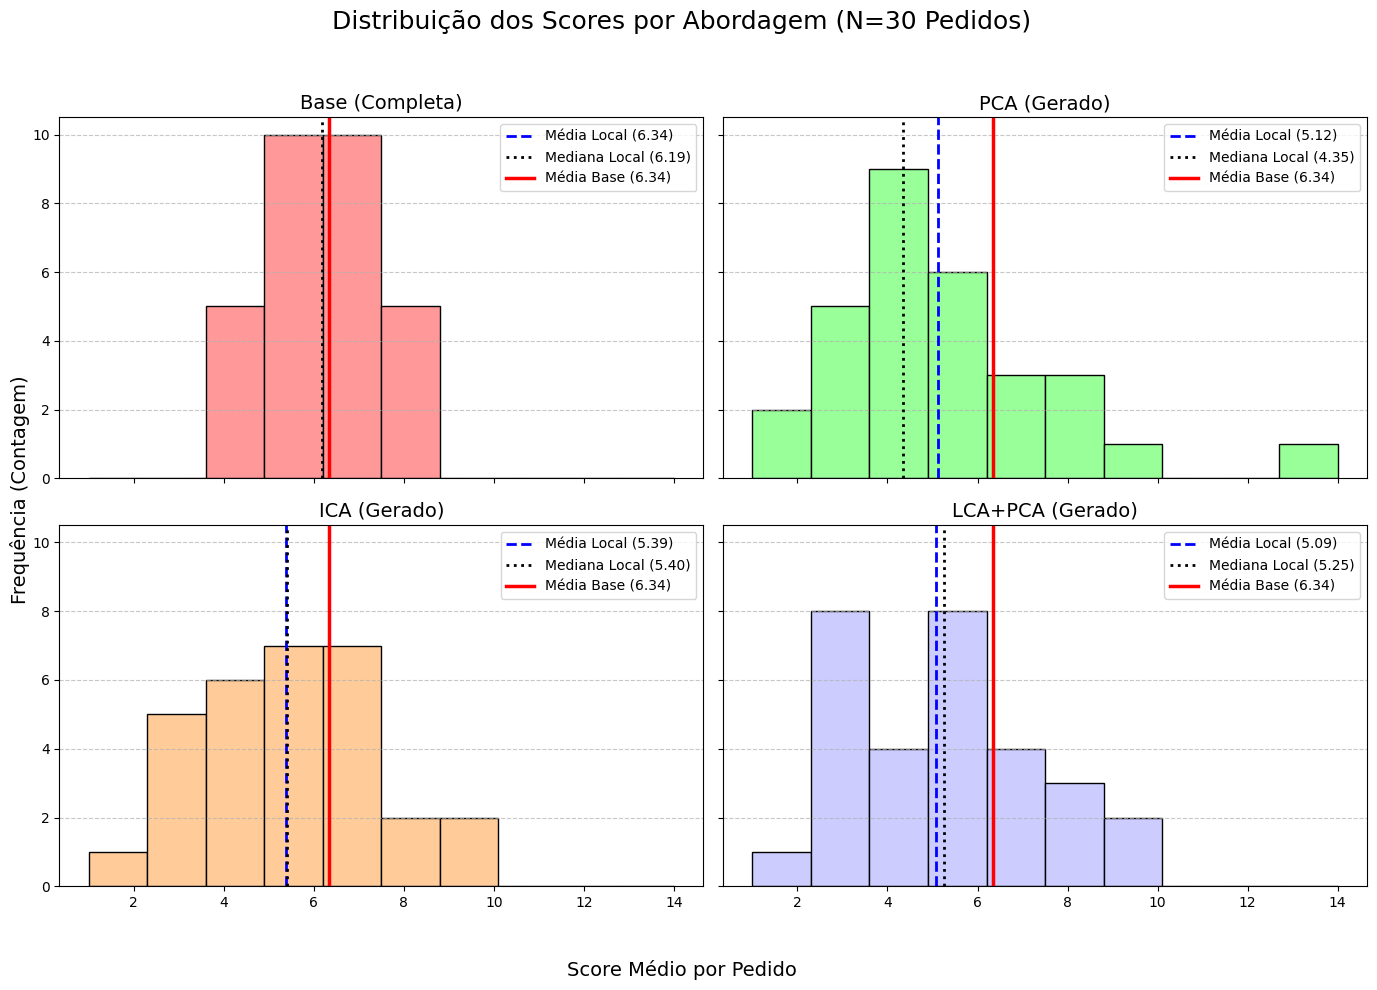

In [14]:
import matplotlib.pyplot as plt
import json
import numpy as np

# --- 1. Carregar o Arquivo JSON ---
file_path = "get_new_scores_results.json"
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar as Listas de Dados ---
    base_completa_scores = []
    pca_gerado_scores = []
    ica_gerado_scores = []
    lca_pca_gerado_scores = []
    
    for item in data:
        if item.get("pca") and item["pca"].get("base_mean_score") is not None:
            base_completa_scores.append(item["pca"]["base_mean_score"])
        if item.get("pca") and item["pca"].get("mean_score") is not None:
            pca_gerado_scores.append(item["pca"]["mean_score"])
        if item.get("ica") and item["ica"].get("mean_score") is not None:
            ica_gerado_scores.append(item["ica"]["mean_score"])
        if item.get("lca_pca") and item["lca_pca"].get("mean_score") is not None:
            lca_pca_gerado_scores.append(item["lca_pca"]["mean_score"])

    # Agrupar os dados e rótulos para facilitar o loop
    data_list = [
        base_completa_scores, 
        pca_gerado_scores, 
        ica_gerado_scores, 
        lca_pca_gerado_scores
    ]
    labels = [
        "Base (Completa)", 
        "PCA (Gerado)", 
        "ICA (Gerado)", 
        "LCA+PCA (Gerado)"
    ]
    colors = ['#FF9999', '#99FF99', '#FFCC99', '#CCCCFF']

    # --- 3. Definir Bins e Média de Base ---
    
    # Calcular a média da "Base (Completa)" PRIMEIRO
    # Esta é a linha de referência que será plotada em todos os gráficos
    mean_base_completa = np.mean(base_completa_scores)
    print(f"Média da Base (Completa) calculada: {mean_base_completa:.2f}")

    # Encontrar o min/max global para que todos os eixos X sejam iguais
    all_scores = np.concatenate(data_list)
    min_score = np.floor(all_scores.min()) # Arredonda para baixo
    max_score = np.ceil(all_scores.max())  # Arredonda para cima
    
    # Definir o número de 'bins' (barras)
    num_bins = 10
    bins = np.linspace(min_score, max_score, num_bins + 1)
    
    print(f"Intervalos (bins) definidos de {min_score} a {max_score}.")

    # --- 4. Criar o Gráfico Facetado (Subplots) ---
    print("Gerando os histogramas facetados...")
    
    # Criar uma grade 2x2. 
    # sharex=True e sharey=True fazem com que todos os subplots usem os mesmos eixos X e Y
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True) 
    
    # 'axes.flat' transforma a grade 2x2 em uma lista simples para o loop
    # zip junta as listas: (ax, dados, label, cor)
    for ax, scores, label, color in zip(axes.flat, data_list, labels, colors):
        # Desenhar o histograma para este subplot
        ax.hist(scores, bins=bins, color=color, edgecolor='black')
        
        # Calcular e plotar a média LOCAL (da abordagem atual)
        mean_local = np.mean(scores)
        ax.axvline(mean_local, color='blue', linestyle='--', linewidth=2, label=f'Média Local ({mean_local:.2f})')
        
        # Calcular e plotar a mediana LOCAL (da abordagem atual)
        median_local = np.median(scores)
        ax.axvline(median_local, color='black', linestyle=':', linewidth=2, label=f'Mediana Local ({median_local:.2f})')
        
        # --- LINHA ADICIONADA ---
        # Adicionar a linha da MÉDIA DE BASE (vermelha) em TODOS os gráficos
        ax.axvline(mean_base_completa, color='red', linestyle='-', linewidth=2.5, label=f'Média Base ({mean_base_completa:.2f})')
        
        ax.set_title(label, fontsize=14)
        ax.legend(fontsize=10) # Ajusta o tamanho da fonte da legenda
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # --- 5. Customizar e Salvar ---
    # Adicionar rótulos principais à figura inteira
    fig.suptitle('Distribuição dos Scores por Abordagem (N=30 Pedidos)', fontsize=18)
    fig.supxlabel('Score Médio por Pedido', fontsize=14)
    fig.supylabel('Frequência (Contagem)', fontsize=14)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 'rect' dá espaço para o suptitle

    # Salvar a imagem
    output_filename = "histogramas_facetados_com_base.png"
    plt.savefig(output_filename)
    
    print(f"Gráfico salvo com sucesso como '{output_filename}'.")

else:
    print("Não foi possível gerar o gráfico pois os dados não foram carregados.")